# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 627


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [26]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Fetch data from OpenWeatherMap API
        response = requests.get(city_url)
        response.raise_for_status()

        
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']

        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']

        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']

        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | naracoorte
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | port mathurin
Processing Record 8 of Set 1 | sola
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | west island
Processing Record 11 of Set 1 | evesham
Processing Record 12 of Set 1 | shakiso
Processing Record 13 of Set 1 | borba
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | bethel
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | tucuma
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | seminole
Processing Record 21 of Set 1 | coahuayana de hidalgo
Processing Record 22 of Set 1 | shakhtinsk
Processing Record 2

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          578
Lat           578
Lng           578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,komusan il-tong,42.1092,129.7000,296.88,34,37,2.10,KP,1683188157
1,adamstown,-25.0660,-130.1015,297.21,72,100,3.85,PN,1683188157
2,gaalkacyo,6.7697,47.4308,306.04,45,36,6.34,SO,1683188158
3,boshan,36.4833,117.8333,288.52,92,100,2.15,CN,1683188141
4,micheweni,-4.9667,39.8333,301.88,67,7,7.11,TZ,1683188159


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("..//output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

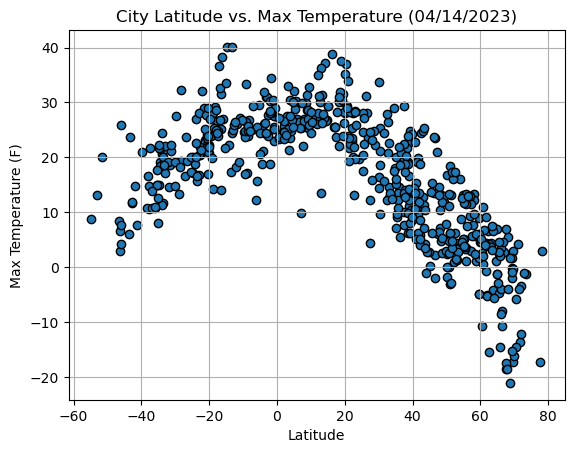

In [11]:
import matplotlib.pyplot as plt

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Max Temperature (04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the grid
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

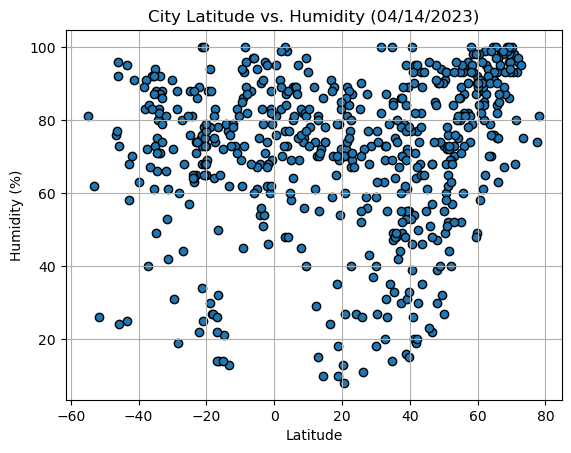

In [12]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Humidity (04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set the grid
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

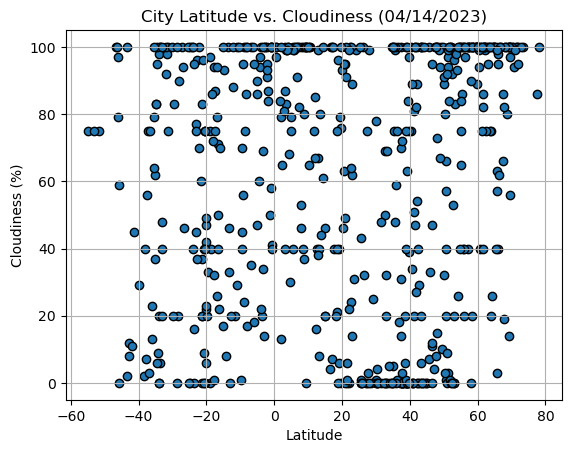

In [13]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Cloudiness (04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set the grid
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

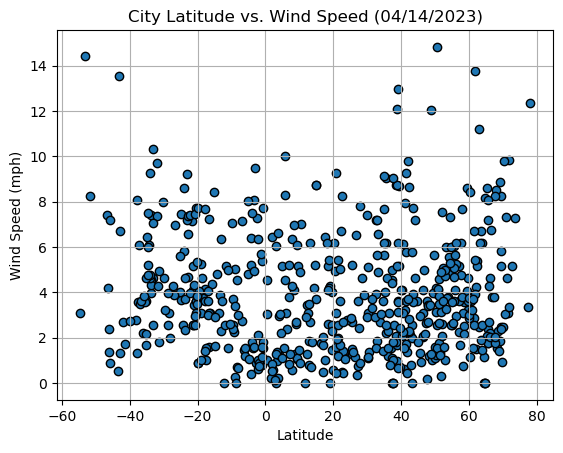

In [14]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Set the title and labels
plt.title("City Latitude vs. Wind Speed (04/14/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set the grid
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Create the plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Add the line equation and r-squared value to the plot
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    r_squared = f"R² = {round(rvalue**2,2)}"
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.annotate(r_squared,(text_coordinates[0],text_coordinates[1]-20),fontsize=15,color="red")
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    # Print the r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Show plot
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# filter the original DataFrame by latitude
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# display sample data
southern_hemi_df.head()


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
from scipy.stats import linregress

# extract data for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, 0), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


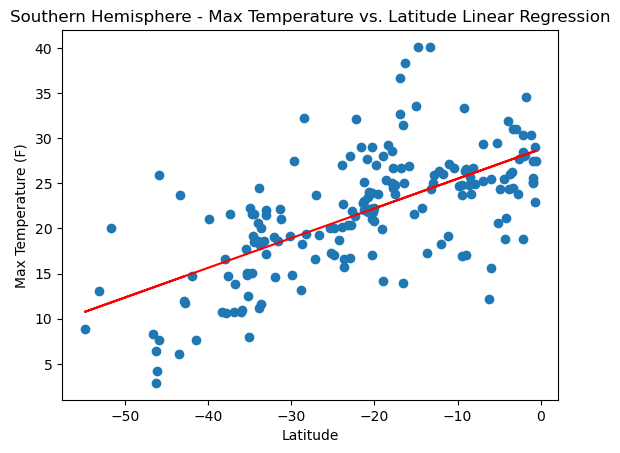

The r-value is: 0.6419546065421795


In [18]:
# Linear regression on Southern Hemisphere
from scipy.stats import linregress

# extract data for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 80), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temperature vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
from scipy.stats import linregress

# extract data for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


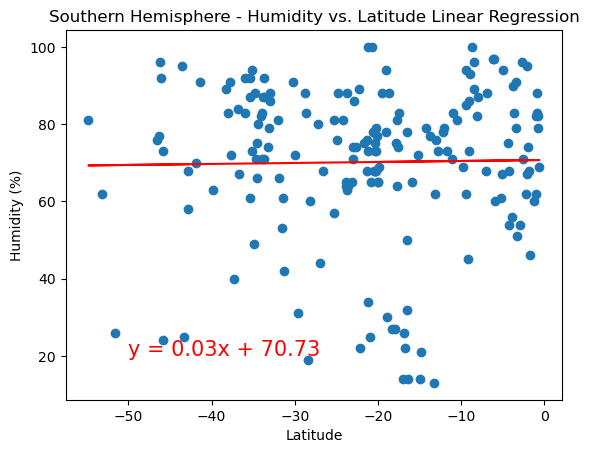

The r-value is: 0.016759316950056787


In [19]:
# Southern Hemisphere
from scipy.stats import linregress

# extract data for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
from scipy.stats import linregress

# extract data for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


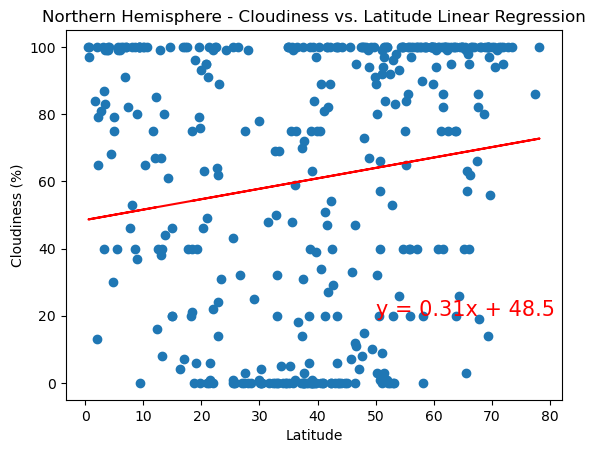

The r-value is: 0.15500489387697092


In [20]:
from scipy.stats import linregress

# extract data for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


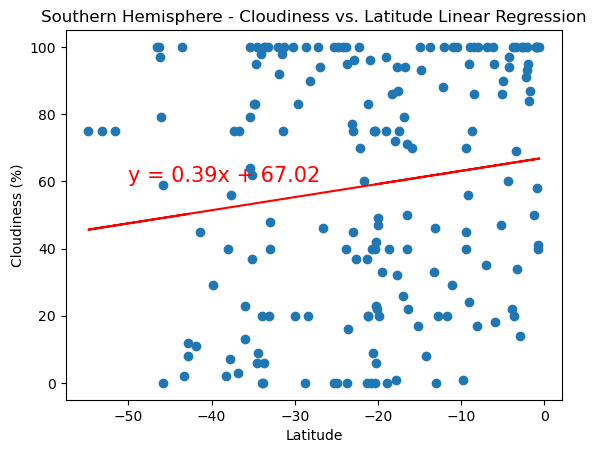

The r-value is: 0.14341322916643248


In [21]:
from scipy.stats import linregress

# extract data for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 60), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

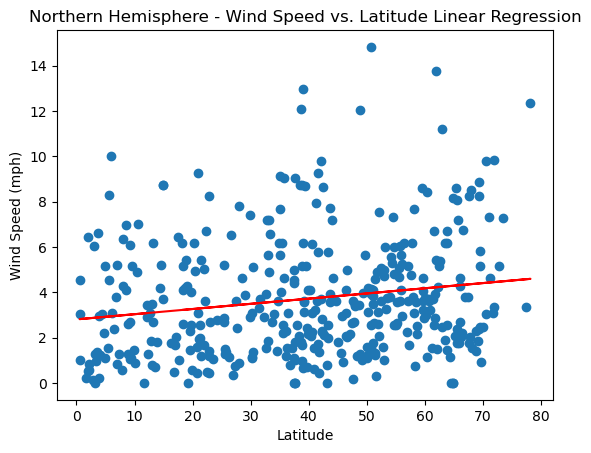

The r-value is: 0.17434667290903336


In [22]:
# Northern Hemisphere
from scipy.stats import linregress

# extract data for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10, 30), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")


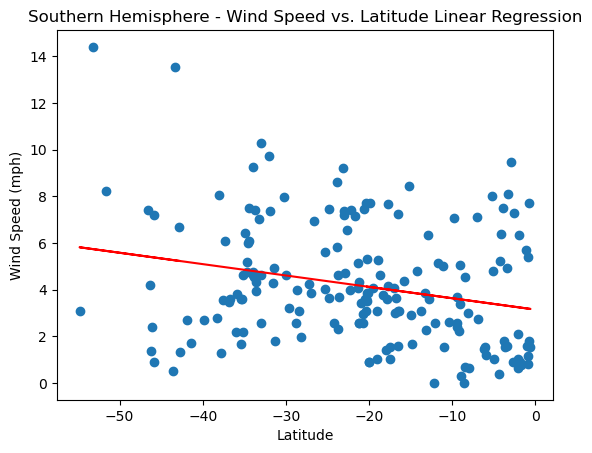

The r-value is: -0.2494775354626458


In [23]:
# Southern Hemisphere
from scipy.stats import linregress

# extract data for Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# calculate regression line
regress_values = x_values * slope + intercept

# create equation of line string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# create scatter plot with regression line
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-50, 20), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

# print r-value
print(f"The r-value is: {rvalue}")

